In [79]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [12]:
!wget -P data https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-18 01:54:48--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘data/housing.csv’

housing.csv         100%[===================>]   1.36M  6.73MB/s    in 0.2s    

2023-09-18 01:54:49 (6.73 MB/s) - ‘data/housing.csv’ saved [1423529/1423529]



The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 


### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [95]:
df = pd.read_csv("data/housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

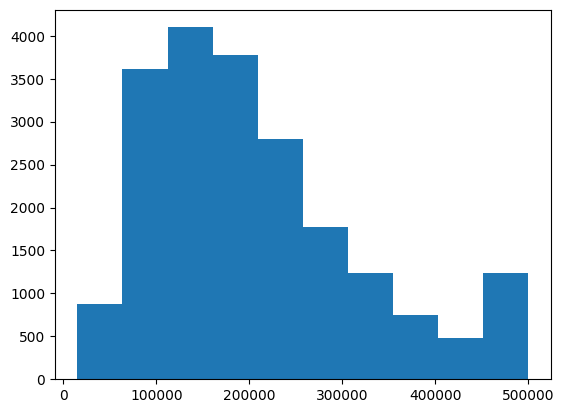

In [96]:
# Look at the median_house_value variable. Does it have a long tail?

plt.hist(df.median_house_value)

In [97]:
df.shape

(20640, 10)

In [98]:
# First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df = df.loc[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [99]:
df.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [100]:
cols_used = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [101]:
df = df[cols_used]

In [102]:
df.shape

(15687, 9)

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [103]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

answer: total_bedrooms

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295


In [104]:
df['population'].quantile(.5)

1195.0

In [105]:
df['population'].median()

1195.0

answer: 1195

### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [106]:
df.index[:10]

Index([701, 830, 859, 860, 861, 862, 863, 870, 880, 881], dtype='int64')

In [107]:
def prepare_data(df):
    np.random.seed(42)
    
    df = df.copy()

    shuffled_idx = np.arange(len(df))
    np.random.shuffle(shuffled_idx)

    val_len = test_len = int(len(df) * 0.2)
    train_len = len(df) - val_len - test_len
    
    train_idx = shuffled_idx[:train_len]
    val_idx = shuffled_idx[train_len:train_len + val_len]
    test_idx = shuffled_idx[train_len + val_len:]

    df['median_house_value'] = np.log1p(df['median_house_value'])

    df_train = df.iloc[train_idx]
    df_val = df.iloc[val_idx]
    df_test = df.iloc[test_idx]

    y_train = df_train['median_house_value'].values
    y_val = df_val['median_house_value'].values
    y_test = df_test['median_house_value'].values

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, df_val, df_test, y_train, y_val, y_test


    

In [108]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df)

In [109]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [110]:
len(y_train), len(y_val), len(y_test)

(9413, 3137, 3137)

In [111]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [112]:
mean_total_bedrooms = df_train['total_bedrooms'].mean()
mean_total_bedrooms

542.552956325786

In [121]:
# rmse when filling missing values with 0

def fill_0(df_train, df_val, y_train, y_val):

    df_train = df_train.copy()
    df_val = df_val.copy()
    
    df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(0)
    df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(0)
    
    lr = LinearRegression()
    lr.fit(df_train, y_train)
    y_pred = lr.predict(df_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)

    return round(rmse, 2)

    

    

In [122]:
fill_0(df_train, df_val, y_train, y_val)

0.34

In [115]:
df_train.isna().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [116]:
df_train['total_bedrooms'].mean()

542.552956325786

In [123]:
# rmse when filling missing values with mean 

def fill_mean(df_train, df_val, y_train, y_val):

    df_train = df_train.copy()
    df_val = df_val.copy()
    
    mean_total_bedrooms = df_train['total_bedrooms'].mean()
    
    df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(mean_total_bedrooms)
    df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(mean_total_bedrooms)
    
    lr = LinearRegression()
    lr.fit(df_train, y_train)
    y_pred = lr.predict(df_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)

    return round(rmse, 2)


In [124]:
fill_mean(df_train, df_val, y_train, y_val)

0.34

answer: Both are equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [129]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [130]:
def linear_regression_reg_score(X_train, X_val, y_train, y_val, r):
    
    X_train = X_train.copy()
    X_val = X_val.copy()
    
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)
    
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
   
    y_pred = w0 + X_val.dot(w)
    rmse = mean_squared_error(y_val, y_pred, squared=False)

    return rmse

In [132]:
for r in  [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    rmse = round(linear_regression_reg_score(df_train, df_val, y_train, y_val, r), 2)
    print(f"r: {r} -----> rmse: {rmse}")

r: 0 -----> rmse: 0.34
r: 1e-06 -----> rmse: 0.34
r: 0.0001 -----> rmse: 0.34
r: 0.001 -----> rmse: 0.34
r: 0.01 -----> rmse: 0.34
r: 0.1 -----> rmse: 0.34
r: 1 -----> rmse: 0.34
r: 5 -----> rmse: 0.35
r: 10 -----> rmse: 0.35


answer: 0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

What's the value of std?

- TODO

In [133]:
def prepare_data(df, seed):
    np.random.seed(seed)
    
    df = df.copy()

    shuffled_idx = np.arange(len(df))
    np.random.shuffle(shuffled_idx)

    val_len = test_len = int(len(df) * 0.2)
    train_len = len(df) - val_len - test_len
    
    train_idx = shuffled_idx[:train_len]
    val_idx = shuffled_idx[train_len:train_len + val_len]
    test_idx = shuffled_idx[train_len + val_len:]

    df['median_house_value'] = np.log1p(df['median_house_value'])

    df_train = df.iloc[train_idx]
    df_val = df.iloc[val_idx]
    df_test = df.iloc[test_idx]

    y_train = df_train['median_house_value'].values
    y_val = df_val['median_house_value'].values
    y_test = df_test['median_house_value'].values

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [134]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed)
    rmse = linear_regression_reg_score(df_train, df_val, y_train, y_val, r=0)
    scores.append(rmse)
    print(f"seed: {seed} ---> rmse: {rmse}")

scores_std = round(np.std(scores), 3)
print(f"std of rmse scores: {scores_std}")
    

seed: 0 ---> rmse: 0.3377387160082512
seed: 1 ---> rmse: 0.3377999353662671
seed: 2 ---> rmse: 0.33842870067715325
seed: 3 ---> rmse: 0.33200494683064413
seed: 4 ---> rmse: 0.3394451862555799
seed: 5 ---> rmse: 0.3433819705287994
seed: 6 ---> rmse: 0.3385330211770828
seed: 7 ---> rmse: 0.34687476972931436
seed: 8 ---> rmse: 0.3512736865968845
seed: 9 ---> rmse: 0.33415582665298454
std of rmse scores: 0.005


answer: 0.005

In [135]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed)
    X_train = df_train.fillna(0)
    X_val = df_val.fillna(0)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    
    scores.append(rmse)
    print(f"seed: {seed} ---> rmse: {rmse}")

scores_std = round(np.std(scores), 3)
print(f"std of rmse scores: {scores_std}")

seed: 0 ---> rmse: 0.33773871600781424
seed: 1 ---> rmse: 0.3377999353662362
seed: 2 ---> rmse: 0.33842870067652864
seed: 3 ---> rmse: 0.33200494683063625
seed: 4 ---> rmse: 0.33944518625554077
seed: 5 ---> rmse: 0.34338197052672964
seed: 6 ---> rmse: 0.33853302117698975
seed: 7 ---> rmse: 0.34687476972931774
seed: 8 ---> rmse: 0.35127368659602953
seed: 9 ---> rmse: 0.33415582665128657
std of rmse scores: 0.005


answer: 0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:


In [151]:
def rmse_test(df, seed, r=0.001):
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, seed)
    df_train_full = pd.concat((df_train, df_val), axis=0)
    y_train_full = np.concatenate((y_train, y_val), axis=0)
    
    X_train_full = df_train_full.fillna(0)
    X_test = df_test.fillna(0)

    rmse = linear_regression_reg_score(X_train_full, X_test, y_train_full, y_test, r=r)

    return rmse

In [155]:
round(rmse_test(df, seed=9, r=0.001), 2)

0.33